# Random Forest and deployment model

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv # For dataframes
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score

In [11]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read  dataset 
# dataframe df
df = read_csv('OverSampled_30May.csv')
print(df.head())

     BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0  16.60      1.0              0.0     0.0             3.0          30.0   
1  20.34      0.0              0.0     1.0             0.0           0.0   
2  26.58      1.0              0.0     0.0            20.0          30.0   
3  24.21      0.0              0.0     0.0             0.0           0.0   
4  23.71      0.0              0.0     0.0            28.0           0.0   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  Asthma  \
0          0.0  0.0          7.0   5.0       2.0               1.0     1.0   
1          0.0  0.0         12.0   5.0       0.0               1.0     0.0   
2          0.0  1.0          9.0   5.0       2.0               1.0     1.0   
3          0.0  0.0         11.0   5.0       0.0               0.0     0.0   
4          1.0  0.0          4.0   5.0       0.0               1.0     0.0   

   KidneyDisease  SkinCancer  HeartDisease  
0            0.0         1.0 

In [3]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,1.0,0.0,1.0,0.0
1,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0
3,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0
4,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584844 entries, 0 to 584843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               584844 non-null  float64
 1   Smoking           584844 non-null  float64
 2   AlcoholDrinking   584844 non-null  float64
 3   Stroke            584844 non-null  float64
 4   PhysicalHealth    584844 non-null  float64
 5   MentalHealth      584844 non-null  float64
 6   DiffWalking       584844 non-null  float64
 7   Sex               584844 non-null  float64
 8   AgeCategory       584844 non-null  float64
 9   Race              584844 non-null  float64
 10  Diabetic          584844 non-null  float64
 11  PhysicalActivity  584844 non-null  float64
 12  Asthma            584844 non-null  float64
 13  KidneyDisease     584844 non-null  float64
 14  SkinCancer        584844 non-null  float64
 15  HeartDisease      584844 non-null  float64
dtypes: float64(16)
memor

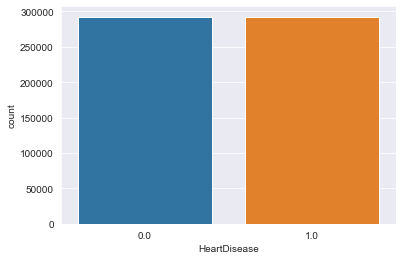

In [5]:
sns.countplot('HeartDisease', data=df)
plt.show()

In [6]:
X = df.iloc[:,0:15]
Y = df.iloc[:,-1]

In [7]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,1.0,0.0,1.0
1,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,0.0,0.0,0.0
2,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,0.0,0.0
3,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,0.0,0.0,1.0
4,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,24.21,0.0,0.0,1.0,0.0,2.0,0.0,0.0,7.0,5.0,0.0,1.0,0.0,0.0,0.0
584840,38.74,1.0,0.0,1.0,30.0,30.0,1.0,1.0,7.0,5.0,2.0,1.0,0.0,1.0,0.0
584841,49.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,2.0,1.0,0.0,0.0,0.0
584842,23.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,1.0,0.0,0.0,0.0


In [8]:
Y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
584839    1.0
584840    1.0
584841    1.0
584842    1.0
584843    1.0
Name: HeartDisease, Length: 584844, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

# Random Forest

In [18]:
model = RandomForestClassifier()

In [19]:
RF_model=model.fit(X_train,y_train)

In [20]:
y_pred_RF=RF_model.predict(X_test)

In [24]:
y_pred_RF

array([0., 1., 1., ..., 1., 1., 1.])

In [25]:
# evaluate predictions
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy of Random Forest : %.2f%%" % (accuracy_RF * 100.0))

Accuracy of Random Forest : 94.26%


In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     96276
         1.0       0.91      0.99      0.95     96723

    accuracy                           0.94    192999
   macro avg       0.95      0.94      0.94    192999
weighted avg       0.95      0.94      0.94    192999



In [28]:
confusion_matrix(y_test, y_pred_RF)

array([[86457,  9819],
       [ 1256, 95467]], dtype=int64)

Accuracy with random forest is 94%

# Saving the trained model

In [31]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
#user_input=scal.transform(user_input)
RF_Y_pred=RF_model.predict(user_input)
if(RF_Y_pred[0]==0):
 print("You have no chances of getting a heart disease!")
else:
  print("Warning!!!You have chances to get a heart disease!")

Enter the values one by one28.87,1.0,0.0,0.0,6.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0
Warning!!!You have chances to get a heart disease!


In [ ]:
# Save Model Using Pickle

In [32]:
import pickle as pkl
pkl.dump(RF_model,open("final_model.p","wb"))

In [33]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.24.2


In [ ]:
# Import streamlit,pyngrok, and ngrok modules

In [34]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

You should consider upgrading via the 'C:\Users\Anuja\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Anuja\anaconda3\python.exe -m pip install --upgrade pip' command.
